In [15]:
%pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 7.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 5.8 MB/s eta 0:00:00:00:01
Note: you may need to restart the kernel to use updated packages.


Generate cropped image of player

In [3]:
import sys
sys.path.append("../")
from utils import read_video
from trackers import Tracker
import cv2

video_frames = read_video("../input_videos/08fd33_4.mp4")
tracker = Tracker("../models/best.pt")
tracks = tracker.get_object_tacks(video_frames, read_from_stub=True, stub_path="../stubs/track.pkl")

for _, player in tracks["player"][0].items():
    print(f"Cropping image from frame: {player}")
    bbox = player["bbox"]
    frame = video_frames[0]

    # crop bbox from frame
    cropped_image = frame[int(bbox[1]):int(bbox[3]), int(bbox[0]):int(bbox[2])]

    cv2.imwrite(f"../output_videos/cropped_image.jpg", cropped_image)
    break


0: 384x640 1 ball, 1 goalkeeper, 18 players, 3 referees, 1856.3ms
1: 384x640 1 ball, 1 goalkeeper, 18 players, 3 referees, 1856.3ms
2: 384x640 1 goalkeeper, 19 players, 3 referees, 1856.3ms
3: 384x640 1 ball, 1 goalkeeper, 20 players, 3 referees, 1856.3ms
4: 384x640 1 goalkeeper, 20 players, 3 referees, 1856.3ms
5: 384x640 1 goalkeeper, 20 players, 3 referees, 1856.3ms
6: 384x640 1 goalkeeper, 19 players, 3 referees, 1856.3ms
7: 384x640 1 ball, 1 goalkeeper, 20 players, 3 referees, 1856.3ms
8: 384x640 1 ball, 1 goalkeeper, 21 players, 3 referees, 1856.3ms
9: 384x640 1 ball, 1 goalkeeper, 19 players, 3 referees, 1856.3ms
10: 384x640 1 goalkeeper, 22 players, 3 referees, 1856.3ms
11: 384x640 1 goalkeeper, 21 players, 3 referees, 1856.3ms
12: 384x640 1 goalkeeper, 22 players, 3 referees, 1856.3ms
13: 384x640 22 players, 3 referees, 1856.3ms
14: 384x640 1 ball, 22 players, 3 referees, 1856.3ms
15: 384x640 1 ball, 19 players, 3 referees, 1856.3ms
16: 384x640 1 ball, 21 players, 3 referees,

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [10]:
image_path = "../output_videos/cropped_image.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

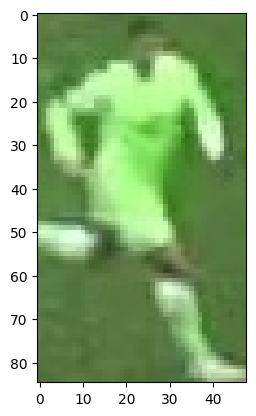

In [11]:
plt.imshow(image)
plt.show()

Take top half of the image

In [20]:
image.shape

(85, 48, 3)

In [12]:
top_half = image[0: int(image.shape[0]/2), :]

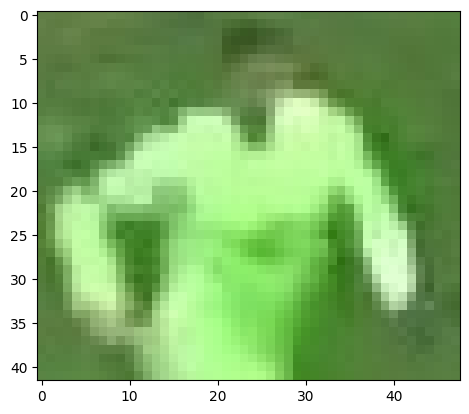

In [13]:
plt.imshow(top_half)
plt.show()

Cluster image into two clusters

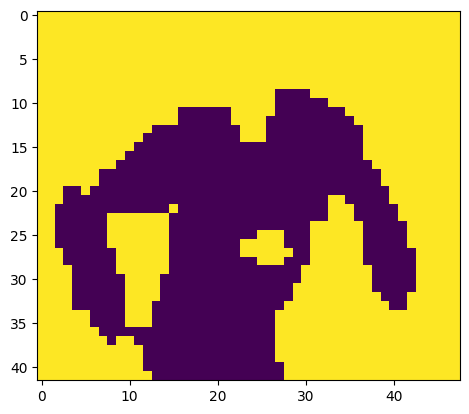

In [21]:
# Reshape the image into 2d array
image_2d = top_half.reshape(-1, 3) # why -1 and 3?

# perform k-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0).fit(image_2d)

# get the cluster labels
labels = kmeans.labels_

# reshape the labels into the original image shape
clustered_image = labels.reshape(top_half.shape[0], top_half.shape[1])

# display the clustered image
plt.imshow(clustered_image)
plt.show()

In [22]:
# the class, 0 or 1, of the boundaries are predominantly those of the background
corner_clusters = [clustered_image[0, 0], clustered_image[0, -1], clustered_image[-1, 0], clustered_image[-1, -1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)   # why the need for a set and key?
print(non_player_cluster)

1


In [23]:
player_cluster = 1 - non_player_cluster
print(player_cluster)

0


In [24]:
# Get the player cluster
kmeans.cluster_centers_[player_cluster]

# one can check the RGB color palette to verify this is greenish

array([     171.14,      235.29,      142.92])

: 

In [1]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.
